# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
!pip install palmerpenguins

In [41]:
from palmerpenguins import load_penguins
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_point, geom_line, labs, scale_color_manual

In [7]:
penguins = load_penguins()
penguins = penguins.dropna()

In [4]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [19]:
# Best Multiple Linear Regression Model

X = penguins.drop("bill_depth_mm", axis=1)
y = penguins["bill_depth_mm"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lr = LinearRegression()
enc = OneHotEncoder()
cols_to_encode = ["species", "island", "sex"]

ct = ColumnTransformer([
    ("One Hot Encoding", enc, cols_to_encode)
], remainder = "passthrough")

Pipeline1 = Pipeline([
    ("Column Transform", ct),
    ("Linear Regression", lr)
])

my_model_1 = Pipeline1.fit(X_train, y_train)
y_test_preds1 = my_model_1.predict(X_test)
y_train_preds1 = my_model_1.predict(X_train)

model1_test_MSE = mean_squared_error(y_test, y_test_preds1)
model1_train_MSE = mean_squared_error(y_train, y_train_preds1)
model1_test_R2 = r2_score(y_test, y_test_preds1)
model1_train_R2 = r2_score(y_train, y_train_preds1)
model1_flexibility = len(my_model_1.named_steps['Linear Regression'].coef_)

model1_test_MSE

In [16]:
# First KNN Regression Model, k=5

X = penguins.drop("bill_depth_mm", axis=1)
y = penguins["bill_depth_mm"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
knn = KNeighborsRegressor(n_neighbors=5)
enc = OneHotEncoder()
cols_to_encode = ["species", "island", "sex"]

ct = ColumnTransformer([
    ("One Hot Encoding", enc, cols_to_encode)
], remainder = "passthrough")

Pipeline1 = Pipeline([
    ("Column Transform", ct),
    ("KNN Regression", knn)
])

my_model_1 = Pipeline1.fit(X_train, y_train)
y_test_preds1 = my_model_1.predict(X_test)
y_train_preds1 = my_model_1.predict(X_train)

model2_test_MSE = mean_squared_error(y_test, y_test_preds1)
model2_train_MSE = mean_squared_error(y_train, y_train_preds1)
model2_test_R2 = r2_score(y_test, y_test_preds1)
model2_train_R2 = r2_score(y_train, y_train_preds1)
model2_flexibility = 5

model2_test_MSE

In [28]:
# Second KNN Regression Model, k=10

X = penguins.drop("bill_depth_mm", axis=1)
y = penguins["bill_depth_mm"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
knn = KNeighborsRegressor(n_neighbors=10)
enc = OneHotEncoder()
cols_to_encode = ["species", "island", "sex"]

ct = ColumnTransformer([
    ("One Hot Encoding", enc, cols_to_encode)
], remainder = "passthrough")

Pipeline1 = Pipeline([
    ("Column Transform", ct),
    ("KNN Regression", knn)
])

my_model_1 = Pipeline1.fit(X_train, y_train)
y_test_preds1 = my_model_1.predict(X_test)
y_train_preds1 = my_model_1.predict(X_train)

model3_test_MSE = mean_squared_error(y_test, y_test_preds1)
model3_train_MSE = mean_squared_error(y_train, y_train_preds1)
model3_test_R2 = r2_score(y_test, y_test_preds1)
model3_train_R2 = r2_score(y_train, y_train_preds1)
model3_flexibility = 10

model3_test_MSE

In [33]:
# Decision Tree Model
X = penguins.drop("bill_depth_mm", axis=1)
y = penguins["bill_depth_mm"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
dt = DecisionTreeRegressor(ccp_alpha=0.1)
enc = OneHotEncoder()
cols_to_encode = ["species", "island", "sex"]

ct = ColumnTransformer([
    ("One Hot Encoding", enc, cols_to_encode)
], remainder = "passthrough")

Pipeline1 = Pipeline([
    ("Column Transform", ct),
    ("Decision Tree Regression", dt)
])

my_model_1 = Pipeline1.fit(X_train, y_train)
y_test_preds1 = my_model_1.predict(X_test)
y_train_preds1 = my_model_1.predict(X_train)

model4_test_MSE = mean_squared_error(y_test, y_test_preds1)
model4_train_MSE = mean_squared_error(y_train, y_train_preds1)
model4_test_R2 = r2_score(y_test, y_test_preds1)
model4_train_R2 = r2_score(y_train, y_train_preds1)
model4_flexibility = 10

model4_test_MSE

In [46]:
# Test KNN Train/Test Accuracy as K increases:

results_df = pd.DataFrame({
    "r_squared" : [],
    "mse" : [],
    "n_neighbors" : [],
    "train_test" : []
})

for i in range(1, 200):
  knn = KNeighborsRegressor(n_neighbors=i)
  my_pipeline = Pipeline([
    ("Column Transform", ct),
    ("KNN Regression", knn)
  ])

  my_model_1 = my_pipeline.fit(X_train, y_train)
  y_test_preds1 = my_model_1.predict(X_test)
  y_train_preds1 = my_model_1.predict(X_train)

  test_MSE = mean_squared_error(y_test, y_test_preds1)
  train_MSE = mean_squared_error(y_train, y_train_preds1)
  test_R2 = r2_score(y_test, y_test_preds1)
  train_R2 = r2_score(y_train, y_train_preds1)
  k = 10

  new_rows = pd.DataFrame({
      "r_squared" : [train_R2, test_R2],
      "mse" : [train_MSE, test_MSE],
      "n_neighbors" : [i, i],
      "train_test" : ["train", "test"]
  })

  results_df = pd.concat([results_df, new_rows])

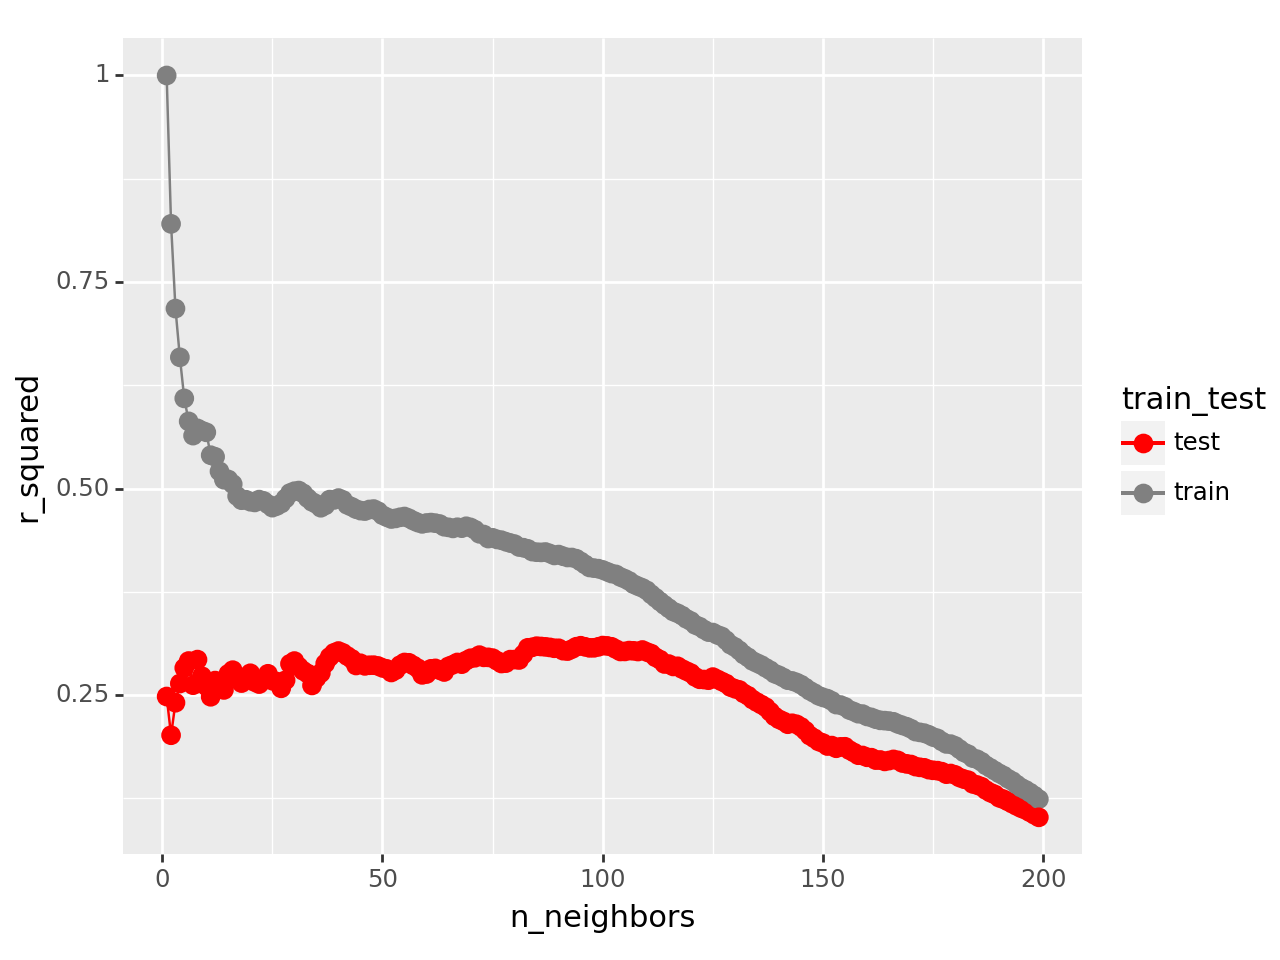

<Figure Size: (640 x 480)>

In [47]:
(ggplot(results_df, aes(x="n_neighbors", y="r_squared", color="train_test")) +
    geom_point(size=3) +
    geom_line(results_df, aes(x="n_neighbors", y="r_squared"))+
    scale_color_manual(values = ("red", "gray"))
)

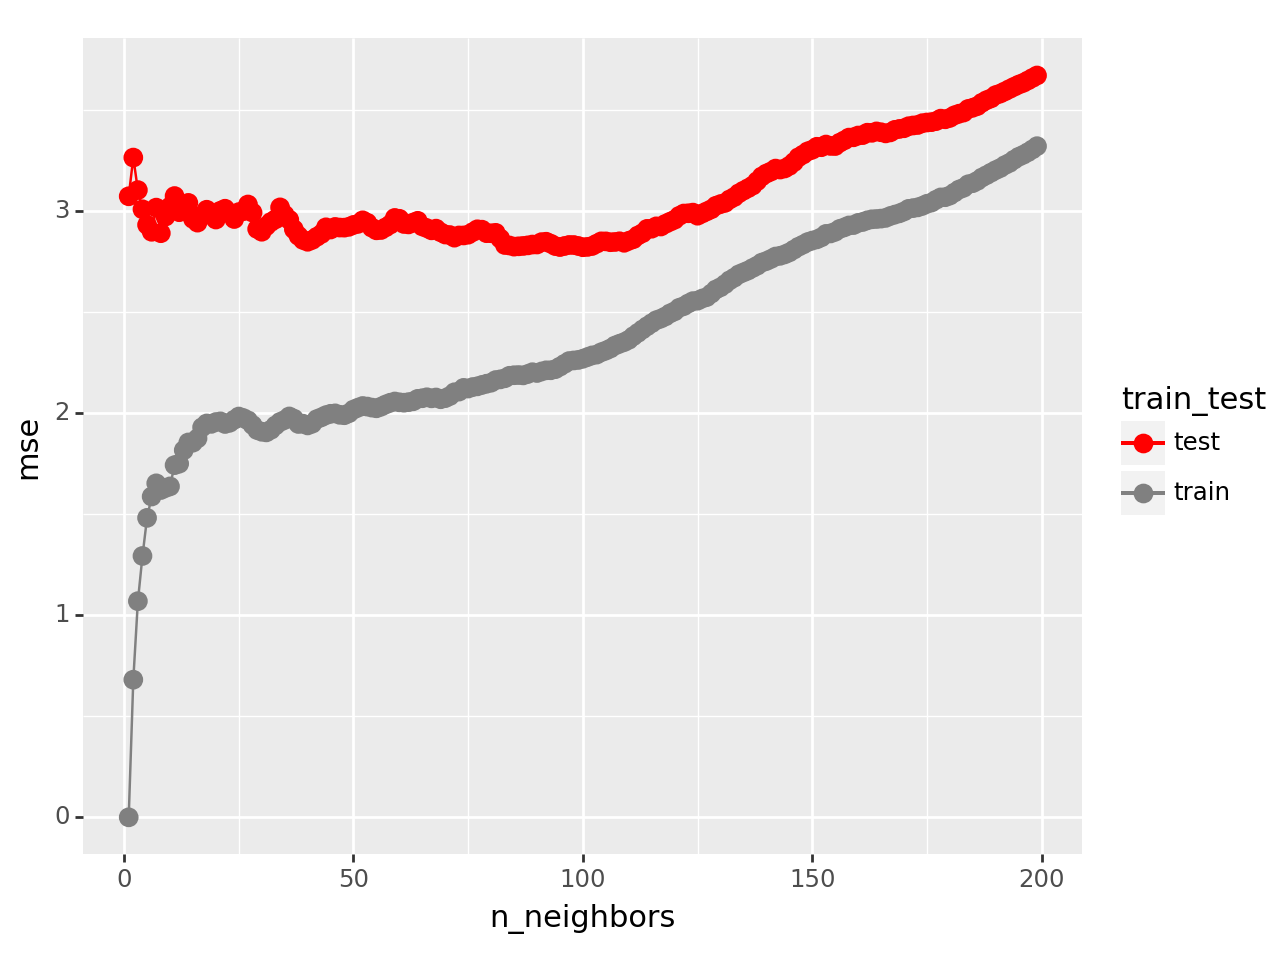

<Figure Size: (640 x 480)>

In [48]:
(ggplot(results_df, aes(x="n_neighbors", y="mse", color="train_test")) +
    geom_point(size=3) +
    geom_line(results_df, aes(x="n_neighbors", y="mse"))+
    scale_color_manual(values = ("red", "gray"))
)

In [61]:
# Test Decision Tree Train/Test Accuracy as alpha increases:

results_df = pd.DataFrame({
    "r_squared" : [],
    "mse" : [],
    "ccp_alpha" : [],
    "train_test" : []
})

for i in [0, 0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.015, 0.02, 0.03, 0.04]:
  dt = DecisionTreeRegressor(ccp_alpha=i)
  my_pipeline = Pipeline([
    ("Column Transform", ct),
    ("Decision Tree Regression", dt)
  ])

  my_model_1 = my_pipeline.fit(X_train, y_train)
  y_test_preds1 = my_model_1.predict(X_test)
  y_train_preds1 = my_model_1.predict(X_train)

  test_MSE = mean_squared_error(y_test, y_test_preds1)
  train_MSE = mean_squared_error(y_train, y_train_preds1)
  test_R2 = r2_score(y_test, y_test_preds1)
  train_R2 = r2_score(y_train, y_train_preds1)
  k = 10

  new_rows = pd.DataFrame({
      "r_squared" : [train_R2, test_R2],
      "mse" : [train_MSE, test_MSE],
      "ccp_alpha" : [i, i],
      "train_test" : ["train", "test"]
  })

  results_df = pd.concat([results_df, new_rows])

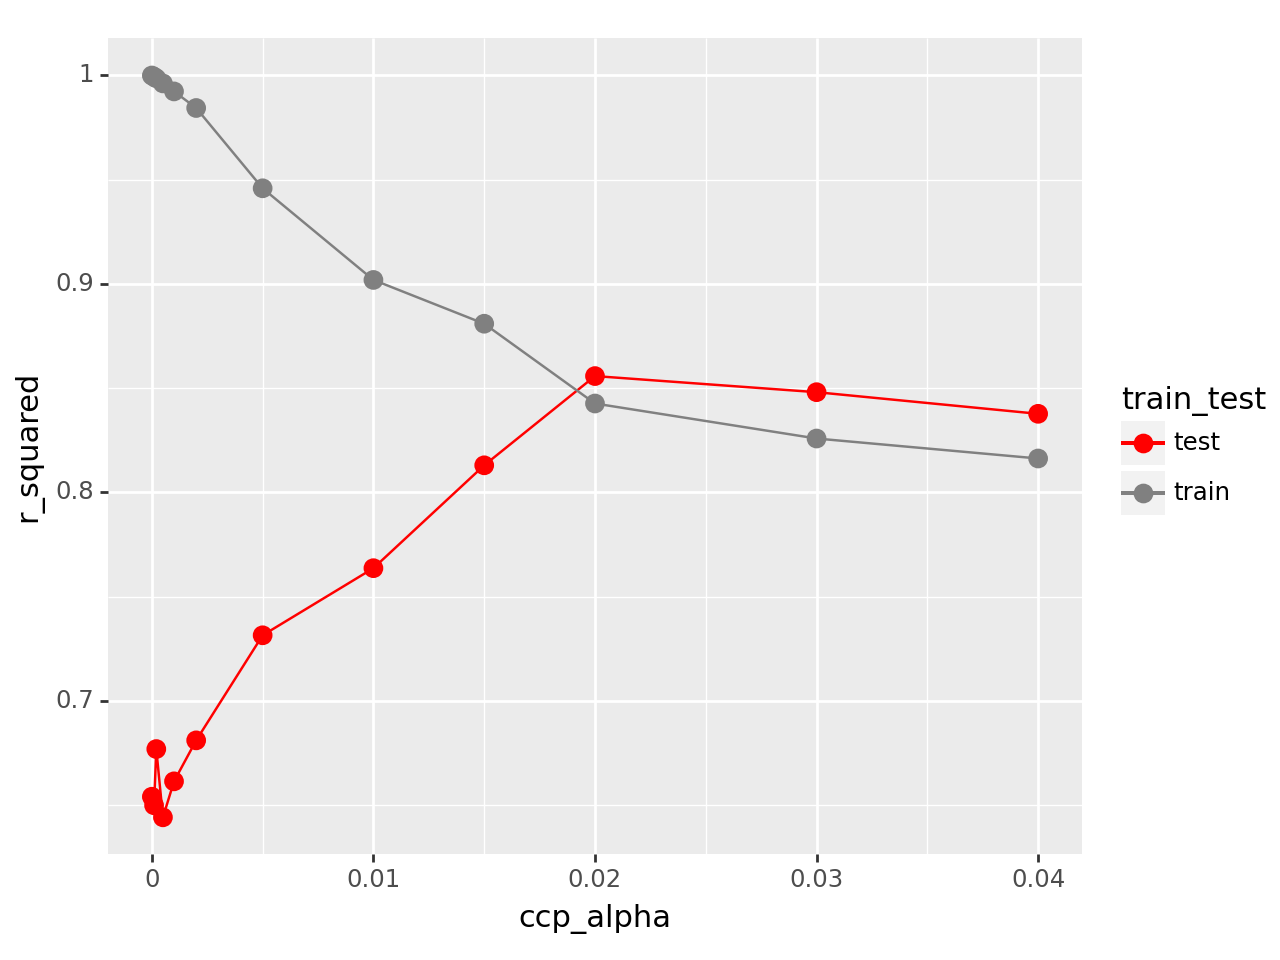

<Figure Size: (640 x 480)>

In [62]:
(ggplot(results_df, aes(x="ccp_alpha", y="r_squared", color="train_test")) +
    geom_point(size=3) +
    geom_line(results_df, aes(x="ccp_alpha", y="r_squared"))+
    scale_color_manual(values = ("red", "gray"))
)

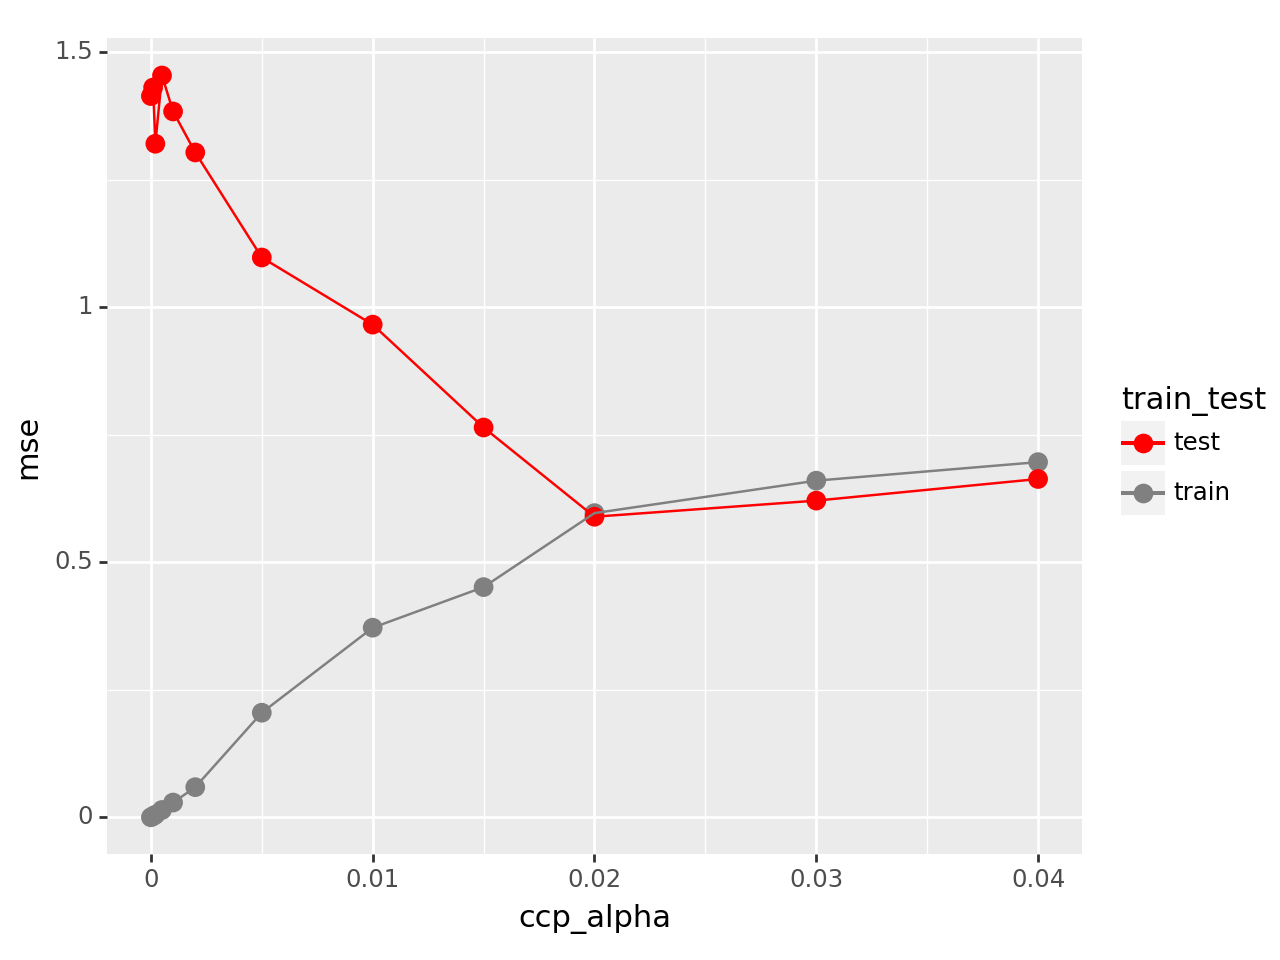

<Figure Size: (640 x 480)>

In [63]:
(ggplot(results_df, aes(x="ccp_alpha", y="mse", color="train_test")) +
    geom_point(size=3) +
    geom_line(results_df, aes(x="ccp_alpha", y="mse"))+
    scale_color_manual(values = ("red", "gray"))
)

### Best Model Evaluation:

For Linear Regression, we already know that the best model was the model with the most flexibility.


We had a Test R-squared and Test MSE of:

In [76]:
print("The Test R-squared for our linear model was: " + str(round(model1_test_R2, 3)))
print("The Test MSE for our linear model was: " + str(round(model1_test_MSE, 3)))

The Test R-squared for our linear model was: 0.865
The Test MSE for our linear model was: 0.552


For the KNN test, our best model occured around K=100, when Test R-squared was maximized and Test MSE was minimized. However, this wasn't great, with an R-squared around 0.31 and an MSE around 2.8

For the Decision Tree test, the best value of alpha was 0.02, and Test R-squared was about 0.86 and Test MSE was about 0.6.

From the look of it, our Decision Tree performed the best once we tuned the alpha parameter.